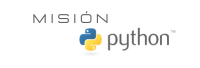

# Conceptos POO aplicados en Python

Ya hemos abordado algunos de los principales conceptos de la POO en Python como **Clases**, **Objetos**, **Asociación**, **Agregación**, **Composición**, **Herencia**, **Atributos y Métodos de instancia y de clase**, **Métodos estáticos**, **Modificadores de acceso**, etc.  


A continuación profundizaremos en otros conceptos importantes asociados a la POO y aplicados en Python

## Encapsulación

Ya anteriormente vimos cómo declarar los atributos de una clase privados __atributo_privado.  

El objetivo de la encapsulación es ocultar la complejidad interna de un objeto y exponer solamente una interfaz pública que permita interactuar con él.  En términos prácticos sería poner los atributos privados (para que no puedan ser accedidos o modificados directamente) y los métodos públicos que accedan o modifiquen el estado del objeto.  

**¿Ventajas de la encapsulación?**

Miremos un ejemplo de una clase **sin** encapsulación y **con** encapsulación

In [ ]:
#Ejemplo sin encapsulación
class Persona:
    def __init__(self, nombre, edad):
        self.nombre = nombre
        self.edad = edad
######################################

p = Persona ("Juan",-30)
print (f"{p.nombre} tiene {p.edad} años")


Cuando permitimos que se pueda acceder directamente a los atributos de una clase, no existe manera de protegerla para evitar el acceso o modificación incorrecta de su estado.   

In [ ]:
#Ejemplo con encapsulación
class Persona:
    def __init__(self, nombre, edad):
        self.set_nombre(nombre)
        self.set_edad(edad)

    def get_nombre(self):
        return self.__nombre

    def set_nombre(self, nombre):
        self.__nombre = nombre

    def get_edad(self):
        return self.__edad

    def set_edad(self, edad):
        self.__edad = edad

p = Persona ("Juan",-30)
#print (f"{p.nombre} tiene {p.edad} años") #esta línea genera error, no podemos acceder a los atributos directamente
print (f"{p.get_nombre()} tiene {p.get_edad()} años") #Solo podemos acceder a los atributos a través de los métodos públicos




**Controlando el acceso a los atributos privados desde los métodos públicos**

In [ ]:
class Persona:
    def __init__(self, nombre, edad):
        self.set_nombre(nombre)
        self.set_edad(edad)

    def get_nombre(self):
        return self.__nombre

    def set_nombre(self, nombre):
        self.__nombre = nombre

    def get_edad(self):
          return self.__edad

    def set_edad(self, edad):
        try:
            if edad >= 0:
                self.__edad = edad
            else:
                raise ValueError("La edad no puede ser negativa")
        except Exception as e:
            self.__edad = None
            print(e)
######################################################################3
p = Persona ("Juan",90)
print (f"{p.get_nombre()} tiene {p.get_edad()} años")

**Ejemplo de Python implementando la encapsulación en sus propias clases**

In [ ]:
lista = [] #Se define un objeto de tipo List vacío
#lista[0] = "hola" #error al intentar establecer un valor directamente
lista.insert(0,"hola")                   #cómo solucionarlo?
print(lista[0])

## Sobrecarga de métodos y constructores

La sobrecarga hace referencia a la capacidad de tener el mismo método definido más de una vez en una clase pero con diferentes cantidades o tipos de parámetros.  En lenguajes como Java, la sobrecarga es un concepto ampliamente aplicable por las características del lenguaje.  Un ejemplo en Java de sobrecarga de constructores es el siguiente:


```
public Persona(){}
public Persona(String nombre){}
public Persona(String nombre, int edad){}
public Persona(String nombre, int edad, String direccion){}
```
Esto permitiría crear objetos de la clase Persona de diferentes maneras.



In [ ]:
p1 = new Persona ()
p1 = new Persona ("Juan")
p1 = new Persona ("Juan",30)
p1 = new Persona ("Juan",30, "calle 3")

In [ ]:
class Persona:
    def __init__(self, nombre):
        self.nombre = nombre

    def __init__(self, nombre, edad):
        self.nombre = nombre
        self.edad = edad

    def salude(self):
        print("Hola")

    def salude(self, nombre):
        print(f"Bueno(a)s {nombre}")
##################################################################
#p1 = Persona("juan") #genera error
p2 = Persona("pedro", 20)
p2.salude() #genera error
p2.salude("dias")

**¿Porqué Python no usa la sobrecarga?**





In [ ]:
class Persona:
    def __init__(self, nombre="NN", edad=None):
        self.nombre = nombre
        self.edad = edad

    def salude(self, nombre=None):
        if nombre is not None:
          print (f"bueno(a)s {nombre}")
        else:
          print("Hola")

##################################################################
po = Persona()
p1 = Persona("juan")
p2 = Persona("pedro", 20)
p2.salude()
p2.salude("noches")

**Termina la siguiente clase llamada Operaciones en Python para que los llamados a los métodos sumar de las líneas 4, 5, 6 y 7 funcionen correctamente:**

In [ ]:
class Operaciones:
   @staticmethod
   def sumar(*args):
    return sum(args)


###############################
print (Operaciones.sumar(3, 4))
print (Operaciones.sumar(4.5, 3.2))
print (Operaciones.sumar(3 ,4, 8, 10, 12))
print (Operaciones.sumar(2.5 ,4, 8.2, 5, 3.5,4,5,6,7,5,3,3,4,5,54,3,34))
print (Operaciones.sumar(3,2,43))

Como puedes ver, el dinamismo y la flexibilidad del lenguaje Python hace que no sea necesaria la sobrecarga.

**Un paso más alla...**

¿Qué pasa si como programador no tengo idea de los atributos que se quieran definir en tiempo de ejecución para una clase?

In [ ]:
class Persona:
  def __init__(self, **kwargs):
      for k in kwargs:
          setattr(self, k, kwargs[k])

  def mostrar_informacion(self):
      print(vars(self))
 ############################################

p1 = Persona(nombre="Julian Valencia")
p1.mostrar_informacion()


p2 = Persona(nombre="Claudia Perez", edad=27)
p2.mostrar_informacion()

p3 = Persona(nombre="Ricardo Luna", edad=30, correo="rluna@gmail.com")
p3.mostrar_informacion()

## Sobreescritura

Se refiere a la capacidad de una subclase de modificar o extender el comportamiento de un método definido en una superclase.

Es decir, si una clase hija tiene un método con el mismo nombre y parámetros que uno definido en la clase padre, entonces el método de la clase hija sobrescribe al método de la clase padre.

In [ ]:
class Animal:
    def hacer_sonido(self):
        print("Un animal está haciendo un sonido")

class Perro(Animal):
    def hacer_sonido(self):
        print("El perro está ladrando")
####################################################
animal = Animal()
animal.hacer_sonido()  # salida: "Un animal está haciendo un sonido"

perro = Perro()
perro.hacer_sonido()  # salida: "El perro está ladrando"

## Polimorfismo


Es la capacidad de objetos de diferentes clases de responder a la misma función o método de manera diferente.

Existen diferentes clases de polimorfismos, veamos algunos ejemplos:

**Polimorfismo con métodos**  es quizás el tipo de polimorfismo más reconocido y consiste en la forma en la que dos diferentes objetos responden de manera diferente ante la invocación del mismo método.  

In [ ]:
#Ejemplo Polimorfismo con métodos
class Animal:
    def __init__(self, nombre):
        self.nombre = nombre

    def hablar(self):
        pass

class Perro(Animal):
    def hablar(self):
        return "guau"

class Gato(Animal):
    def hablar(self):
        return "miau"
######################################################
animales = [Perro("Firulays"), Gato("Tom")]

for animal in animales:
    print(animal.nombre + ": " + animal.hablar())

**Polimorfismo con funciones** es la capacidad que tienen las funciones de adaptar su comportamiento para responder de manera diferente ante la invocación con diferentes parámetros

In [ ]:
#Ejemplo Polimorfismo con funciones
def suma(a, b):
    return a + b

print(suma(2, 3))   # Salida: 5
print(suma("Hola", " Mundo"))   # Salida: "Hola Mundo"
print(suma(5.6, 2.5))   # Salida: 8.1
print (suma([3, 2],[4, 9]))  #Salida: [3, 2, 4, 9]

**Polimorfismo paramétrico**  Hace referencia a la capacidad que tiene un método de adaptar su comportamiento de acuerdo con el objeto que recibe como parámetro, sin necesidad de escribir un método diferente para cada tipo de objeto.

In [ ]:
#Ejemplo polimorfismo paramétrico
class Animal:
    def hacer_sonido(self):
        pass

class Perro(Animal):
    def hacer_sonido(self):
        print("¡guau!")

class Gato(Animal):
    def hacer_sonido(self):
        print("¡miau!")

class Burro(Animal):
    def hacer_sonido(self):
        print("¡grugruhghghgh!")

#########################################
def hacer_sonido_animal(animal):
    if isinstance(animal, Animal):
        animal.hacer_sonido()
    else:
        print("Este objeto no es un animal")
##################################################
perro = Perro()
gato = Gato()
burro = Burro()
otro_objeto = object()

hacer_sonido_animal(perro)   # Salida: ¡guau!
hacer_sonido_animal(gato)# Salida: ¡miau!
hacer_sonido_animal(burro)
hacer_sonido_animal(otro_objeto) # Salida: Este objeto no es un animal

## Cohesión

La cohesión es el grado en que los miembros de una clase (atributos y métodos) se relacionan entre sí y trabajan armónicamente para lograr el resultado definido.

En POO se recomienda que las clases tengan una alta cohesión.  Miremos un ejemplo de alta y baja cohesión usando la clase Cuenta

In [ ]:
#Clase Cuenta con baja cohesión:
class Cuenta:
  def __init__(self, saldo, cliente, ciudad):
    self.saldo = saldo
    self.cliente = cliente
    self.ciudad = ciudad

  def calcular_impuesto(self):
    if isinstance(self, Ahorro):
      impuesto = self.saldo *0.05
    else:
      impuesto = self.saldo *0.07
    return impuesto

In [ ]:
#Clase Cuenta con alta cohesión:
class Cuenta:
  def __init__(self, interes=0.03, saldo=0):
    self.saldo = saldo
    self.interes = interes

  def depositar(self, monto):
    self.saldo += monto

  def retirar(self, monto):
    if self.saldo-monto >=0:
      self.saldo -= monto

  def consultar(self):
    return self.saldo

  def aplicar_interes(self):
    saldo = saldo + (saldo*self.interes)

  def retornar_interes(self):
    return self.interes


## Acoplamiento

El acoplamiento en POO se refiere al nivel de dependencia entre las clases.  De esta manera, un alto acoplamiento significa que los cambios en una clase repercuten en otra.  

En POO se recomienda tener bajo acoplamiento, de esta manera, las clases  están menos interconectadas y son más independientes. Esto puede hacer que el sistema sea más fácil de mantener y modificar.

In [ ]:
#Ejemplo Alto Acoplamiento
class Persona:
    def __init__(self, nombre, edad):
        self.nombre = nombre
        self.edad = edad

    def saludar(self):
        print(f"Hola, mi nombre es {self.nombre} y tengo {self.edad} años.")

class Empleado:
    def __init__(self, nombre, edad, salario):
        self.persona = Persona(nombre, edad) #esto crea alto acoplamiento
        self.salario = salario

    def presentarse(self):
        self.persona.saludar()
        print(f"Soy un empleado y mi salario es {self.salario}")
################################################################
e = Empleado("Juan", 30, 1200)
e.presentarse()
e.persona.saludar()

In [ ]:
#Ejemplo Bajo Acoplamiento
class Persona:
    def __init__(self, nombre, edad):
        self.nombre = nombre
        self.edad = edad

    def saludar(self):
        print(f"Hola, mi nombre es {self.nombre} y tengo {self.edad} años.")

class Empleado:
    def __init__(self, persona, salario):
        self.persona = persona #bajo acoplamiento
        self.salario = salario

    def presentarse(self):
        self.persona.saludar()
        print(f"Soy un empleado y mi salario es {self.salario}")
###############################################################
p = Persona("Carlos", 45)
e = Empleado(p, 1200)
e.presentarse()
p.saludar()

## Clases Abstractas

Una clase abstracta es una clase que no se pueden instanciar directamente y que definen métodos concretos (con código) o abstractos (métodos sin código en su cuerpo).  Estas clases abstractas son creadas para ser heredadas por otras clases concretas cuya obligación es implementar los métodos abstractos heredados.  

**Sintaxis:**

Para definir una clase abstracta en Python se debe importar el módulo **abc** que significa **Abstract Base Classes** este módulo cuenta con una clase **ABC** de ka cual debe heredar cualquier clase abstracta.



```
from abc import ABC
class MiClaseAbstracta(ABC):
```
Los métodos abstractos dentro de una clase abstracta deben llevar el decorador @abstractmethod

```
from abc import ABC, abstractmethod

class MiClaseAbstracta(ABC):

    @abstractmethod
    def metodo_abstracto(self):
        pass
```


In [ ]:
from abc import ABC, abstractmethod
class Persona(ABC):

  @abstractmethod
  def saludo(self):
    pass
########################################
p = Persona()

In [ ]:
from abc import ABC, abstractmethod
class Figura(ABC):

  def mensaje (self):
    print ("Hola, soy una figura geométrica")

  @abstractmethod
  def calcular_area(self):
    pass
#######################################
class Cuadrado(Figura):
  def __init__(self, lado):
    self.lado = lado

  def calcular_area(self):   #implementando el método abstracto heredado
    return self.lado*self.lado
########################################

class Triangulo(Figura):
  def __init__(self, base, altura):
    self.base = base
    self.altura = altura

  def calcular_area(self):   #implementando el método abstracto heredado
    return (self.base * self.altura) / 2
########################################

c = Cuadrado(5)
c.mensaje()   #se hereda el método concreto
print("el area del cuadrado es: ",c.calcular_area())

t = Triangulo (5,3)
t.mensaje()
print("El area del triangulo es:",t.calcular_area())

## Interfaces

En Python no existe una palabra reservada para definir una interfaz.  Una iterfaz en Python es una clase abstracta donde todos sus métodos son abstractos.  Al tener una interfaz, la clase concreta que hereda de ella está obligada a implementar todos los métodos definidos en la interfaz.  

In [ ]:
from abc import ABC, abstractmethod
class Humano (ABC):
  @abstractmethod
  def respirar(self):
    pass

  @abstractmethod
  def comer(self):
    pass

  @abstractmethod
  def dormir(self):
    pass

In [ ]:
class Estudiante(Humano):
  pass

In [ ]:
est1 = Estudiante()

# Apropiación

1. Cree una clase llamada "CuentaBancaria" que tenga atributos privados para el número de cuenta, el titular de la cuenta y el saldo. Cree métodos para depositar, retirar y transferir dinero entre cuentas. Asegúrese de que no se puedan modificar ni el número de cuenta ni el titular de la cuenta una vez creada la instancia de la clase. Además, que el saldo nunca sea negativo y que las transferencias solo puedan realizarse entre cuentas de la misma moneda.

2.  Cree una clase llamada Figura y tres subclases llamadas Circulo, cuadrado y Triangulo.  Realice una implementación de las clases consistentes con el nombre de cada una y sobreescriba el método **calcular_area()** en cada subclase para que el resultado sea el correcto de acuerdo con su nombre. Compruebe el funcionamiento de las diferentes clases.

3. Cree una Interface llamada Juego con los métodos abstractos iniciar, mostrar_puntaje, terminar.  Cree un juego sencillo que implemente la interfaz Juego y compruebe el funcionamiento del mismo.

In [ ]:
from abc  import ABC,abstractmethod
class Juego(ABC):
    @abstractmethod
    def Iniciar(self):
        pass
    @abstractmethod
    def Mostrar_puntaje(self):
        pass
    @abstractmethod
    def Terminar(self):
        pass
    
class Jugando(Juego):
  __puntaje=0
   
  def Iniciar(self):
      print("Bienvenido")
      
  def GanaPunto(cls):
      cls.__puntaje+=5
      
  def Mostrar_puntaje(self):
      return "El puntaje acumulado va en:"+str(self.__puntaje)
      
  def Terminar(self):
      print("Vuelva pronto")
      
        
j=Jugando()
j.Iniciar()
j.GanaPunto()
j.GanaPunto()
j.GanaPunto()
print(j.Mostrar_puntaje())
j.Terminar()


: 